In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "64"
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import pi
import time
matplotlib.rc('text', usetex=False)
plt.tight_layout()
import seaborn as sns
import ipyparams

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [2]:
# import classy module
class_path = '/afs/crc.nd.edu/user/s/sghosh5/driso2/class_driso' # Local path to the CLASS folder # make -all after any modification
classy_path = ''
for elem in os.listdir(os.path.join(
        class_path, "python", "build")):
    if elem.find("lib.") != -1:
        classy_path = os.path.join(
            class_path, "python", "build", elem)
    if len(classy_path)==1:
        classy_path = classy_path[0]
    else:
        stringcheck = "%i.%i"%(sys.version_info.major,sys.version_info.minor)
        for path in classy_path:
            if stringcheck in path:
                classy_path = path
                break

# Inserting the previously found path into the list of folders to
# search for python modules.
sys.path.insert(1, classy_path)
try:
    from classy import Class as ClassN
except ImportError:
    print('Error: Could not import Classy.')

In [3]:
M = ClassN()
sys.path.remove(classy_path)
del ClassN
del sys.modules['classy']

Producing FDR spectrum

In [4]:
fdr_addrid = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "free_streaming", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad&drid',
            'f_drid' : 2.0,
            'n_drid' : 1.5,
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes',
            'format' : 'camb',
}

In [5]:
fdr_addrid_neff = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046+0.2,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "free_streaming", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad&drid',
            'f_drid' : 2.0,
            'n_drid' : 1.5,
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [6]:
fdr_ad = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "free_streaming", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad',
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [7]:
fdr_ad_neff = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046+0.2,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "free_streaming", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad',
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [8]:
M.set(fdr_addrid)
M.compute()
addrid = M.lensed_cl()
M.empty()
M.set(fdr_addrid_neff)
M.compute()
addridneff = M.lensed_cl()
M.empty()
M.set(fdr_ad)
M.compute()
ad = M.lensed_cl()
M.empty()
M.set(fdr_ad_neff)
M.compute()
adneff = M.lensed_cl()
M.empty()

In [9]:
ell=ad['ell']
ellfactor=ell*(ell+1)/(2*np.pi)

Text(0.5, 1.0, 'fDR')

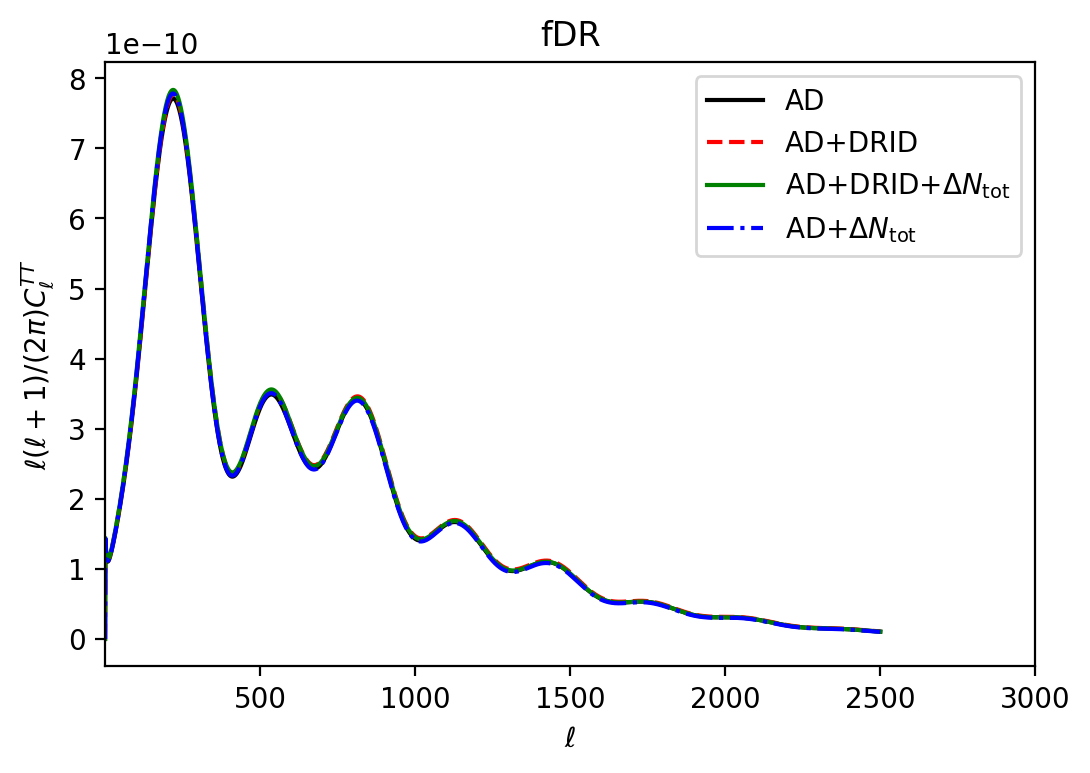

In [10]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,3000])
plt.plot(ad['ell'],ad[pp]*ellfactor, c='k', label = 'AD')
plt.plot(addrid['ell'],addrid[pp]*ellfactor, c='r', label = 'AD+DRID', ls='--')
plt.plot(addridneff['ell'],addridneff[pp]*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(adneff['ell'],adneff[pp]*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell + 1)/(2 \pi)C_\ell^{TT}$')
plt.legend()
plt.title('fDR')

/tmp/661938.1.long/ipykernel_1705455/3045843303.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(addrid['ell'],addrid[pp]/ad[pp] - 1, c='r', label = r'AD+DRID', ls='--')
/tmp/661938.1.long/ipykernel_1705455/3045843303.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(addridneff['ell'],addridneff[pp]/ad[pp] - 1, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
/tmp/661938.1.long/ipykernel_1705455/3045843303.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ad['ell'],adneff[pp]/ad[pp]- 1, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')


Text(0.5, 1.0, 'fDR')

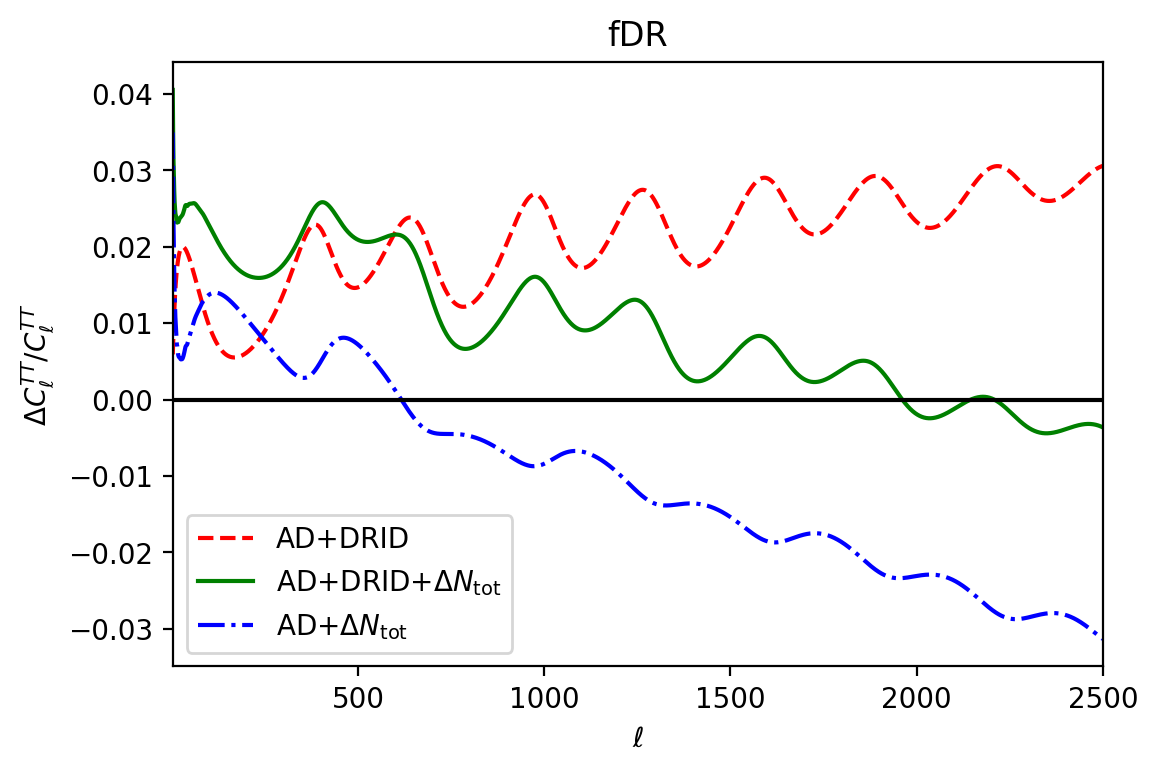

In [11]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],addrid[pp]/ad[pp] - 1, c='r', label = r'AD+DRID', ls='--')
plt.plot(addridneff['ell'],addridneff[pp]/ad[pp] - 1, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],adneff[pp]/ad[pp]- 1, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{TT}/C_\ell^{TT}$')
plt.legend()
plt.title('fDR')

Text(0.5, 1.0, 'fDR')

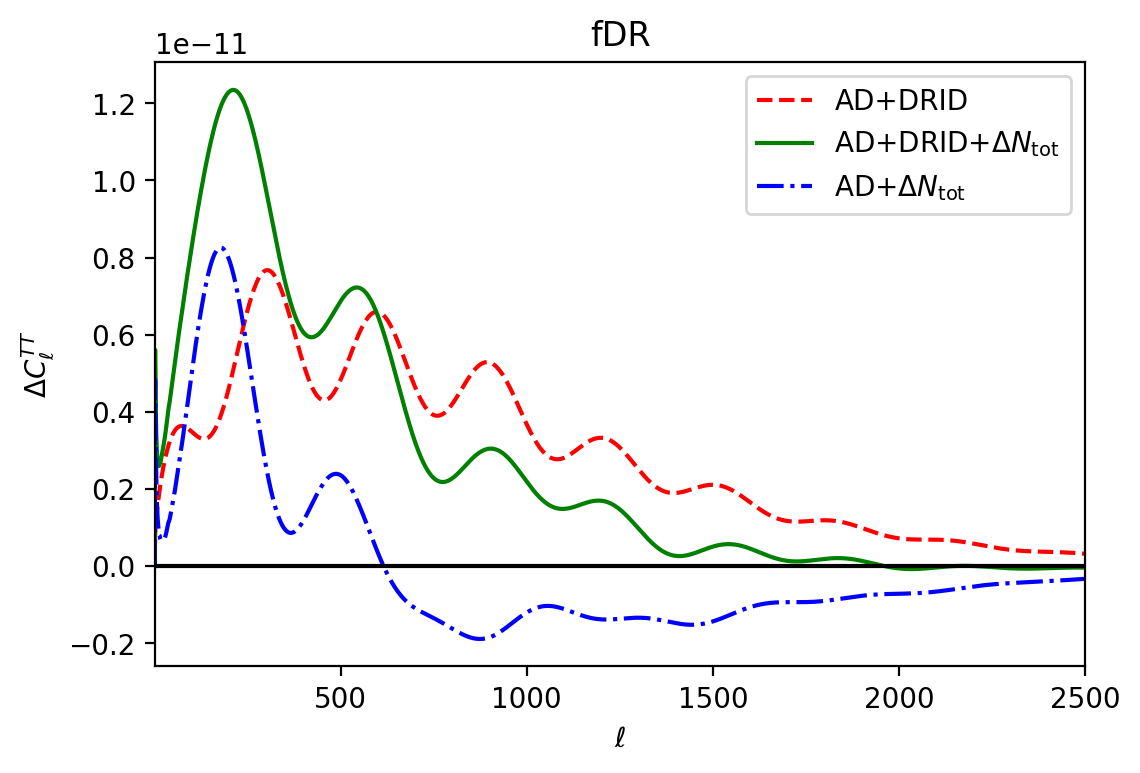

In [12]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],(addrid[pp] -ad[pp])*ellfactor , c='r', label = 'AD+DRID', ls='--')
plt.plot(addridneff['ell'],(addridneff[pp] - ad[pp])*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],(adneff[pp] - ad[pp])*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{TT}$')
plt.legend()
plt.title('fDR')

Text(0.5, 1.0, 'fDR')

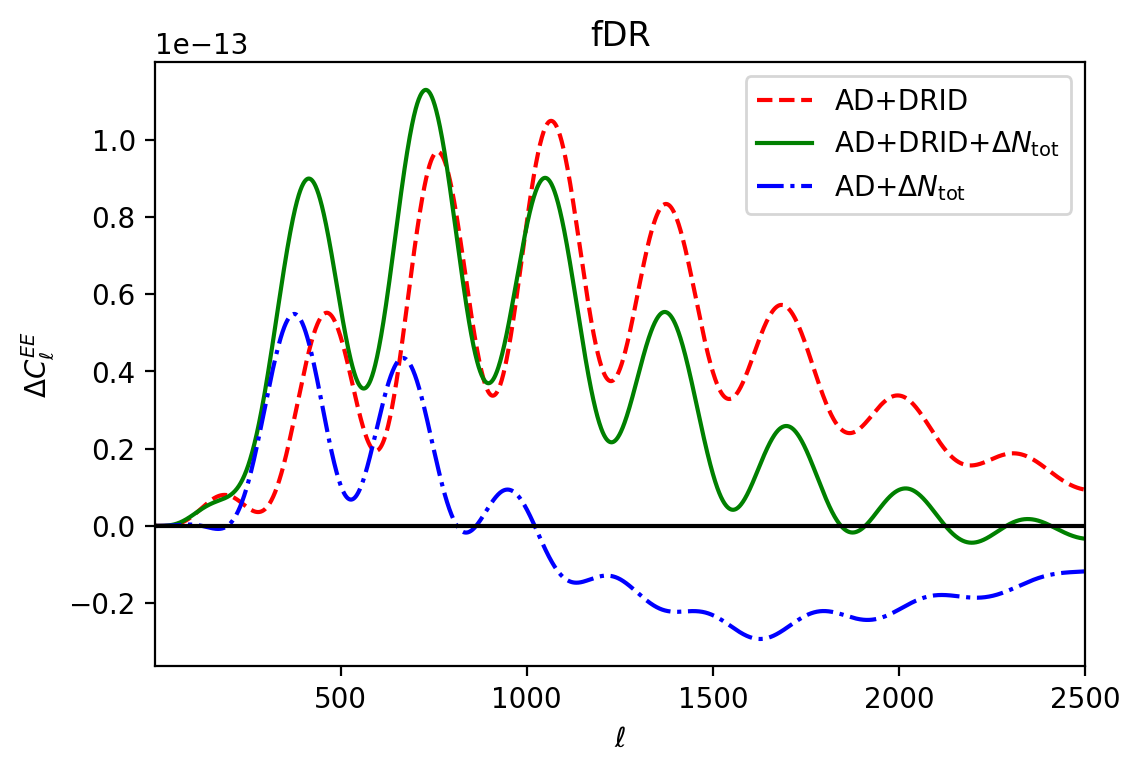

In [13]:
pp = 'ee'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],(addrid[pp] -ad[pp])*ellfactor , c='r', label = 'AD+DRID', ls='--')
plt.plot(addridneff['ell'],(addridneff[pp] - ad[pp])*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],(adneff[pp] - ad[pp])*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{EE}$')
plt.legend()
plt.title('fDR')

Producing CDR spectrum

In [14]:
cdr_addrid = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "fluid", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad&drid',
            'f_drid' : 3.0,
            'n_drid' : 1.7,
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [15]:
cdr_addrid_neff = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046+0.2,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "fluid", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad&drid',
            'f_drid' : 3.0,
            'n_drid' : 1.7,
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [16]:
cdr_ad = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "fluid", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad',
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [17]:
cdr_ad_neff = {# LambdaCDM parameters
            'omega_b' :0.02237,
            'omega_cdm' : 0.1200,
            '100*theta_s' : 1.04092,
            'tau_reio' : 0.0544,
            'ln10^{10}A_s' : 3.044,
            'n_s' : 0.9649,
#-----------DR & NU Parameters------------
            'N_ur' : 2.046+0.2,
            'N_idr' : 1.0,
            'stat_f_idr' : 0.875, # Fermionic DR
            'idr_nature' : "fluid", # DR is free streaming
#----------Gauge & initial conditions------------
            'gauge' : 'synchronous',
            'ic' : 'ad',
#-----------Output parameters------------
            'output' : 'tCl,pCl,lCl,mPk',
            'lensing': 'yes'
}

In [18]:
M.set(cdr_addrid)
M.compute()
addrid = M.lensed_cl()
M.empty()
M.set(cdr_addrid_neff)
M.compute()
addridneff = M.lensed_cl()
M.empty()
M.set(cdr_ad)
M.compute()
ad = M.lensed_cl()
M.empty()
M.set(cdr_ad_neff)
M.compute()
adneff = M.lensed_cl()
M.empty()

Text(0.5, 1.0, 'cDR')

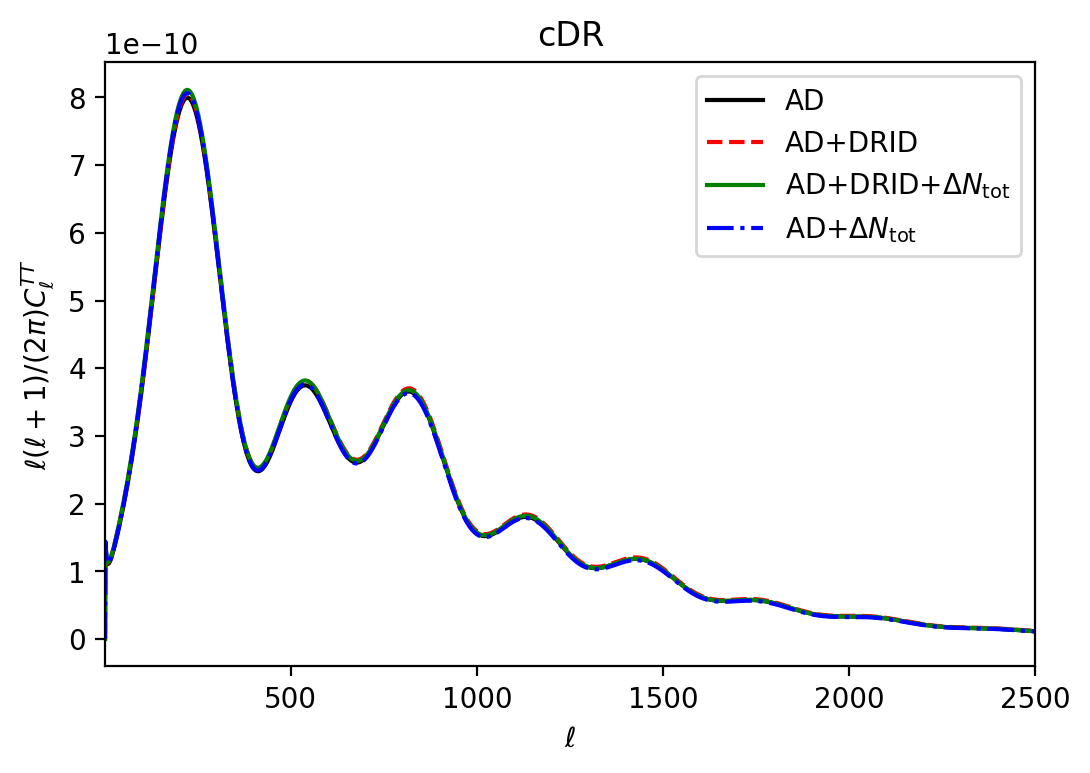

In [19]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(ad['ell'],ad[pp]*ellfactor, c='k', label = 'AD')
plt.plot(addrid['ell'],addrid[pp]*ellfactor, c='r', label = 'AD+DRID', ls='--')
plt.plot(addridneff['ell'],addridneff[pp]*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(adneff['ell'],adneff[pp]*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell + 1)/(2 \pi)C_\ell^{TT}$')
plt.legend()
plt.title('cDR')

/tmp/661938.1.long/ipykernel_1705455/560542632.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(addrid['ell'],addrid[pp]/ad[pp] - 1, c='r', label = r'AD+DRID', ls='--')
/tmp/661938.1.long/ipykernel_1705455/560542632.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(addridneff['ell'],addridneff[pp]/ad[pp] - 1, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
/tmp/661938.1.long/ipykernel_1705455/560542632.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ad['ell'],adneff[pp]/ad[pp]- 1, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')


Text(0.5, 1.0, 'cDR')

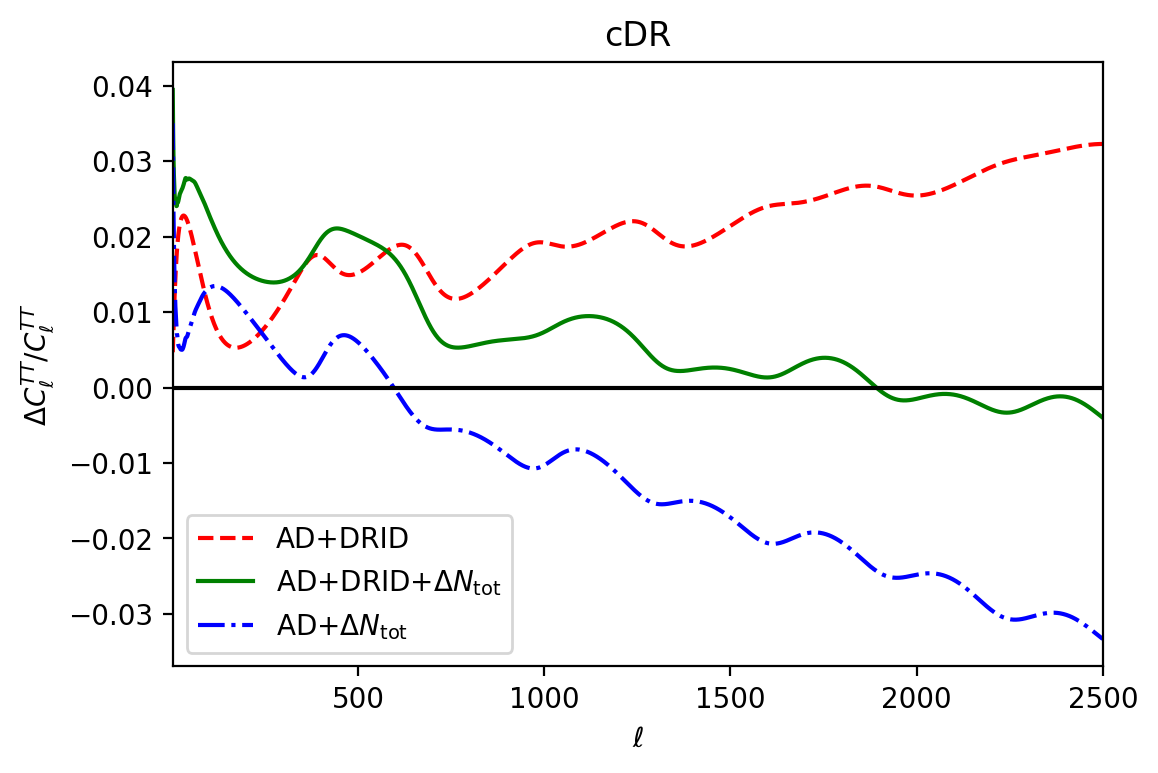

In [20]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],addrid[pp]/ad[pp] - 1, c='r', label = r'AD+DRID', ls='--')
plt.plot(addridneff['ell'],addridneff[pp]/ad[pp] - 1, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],adneff[pp]/ad[pp]- 1, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{TT}/C_\ell^{TT}$')
plt.legend()
plt.title('cDR')

Text(0.5, 1.0, 'cDR')

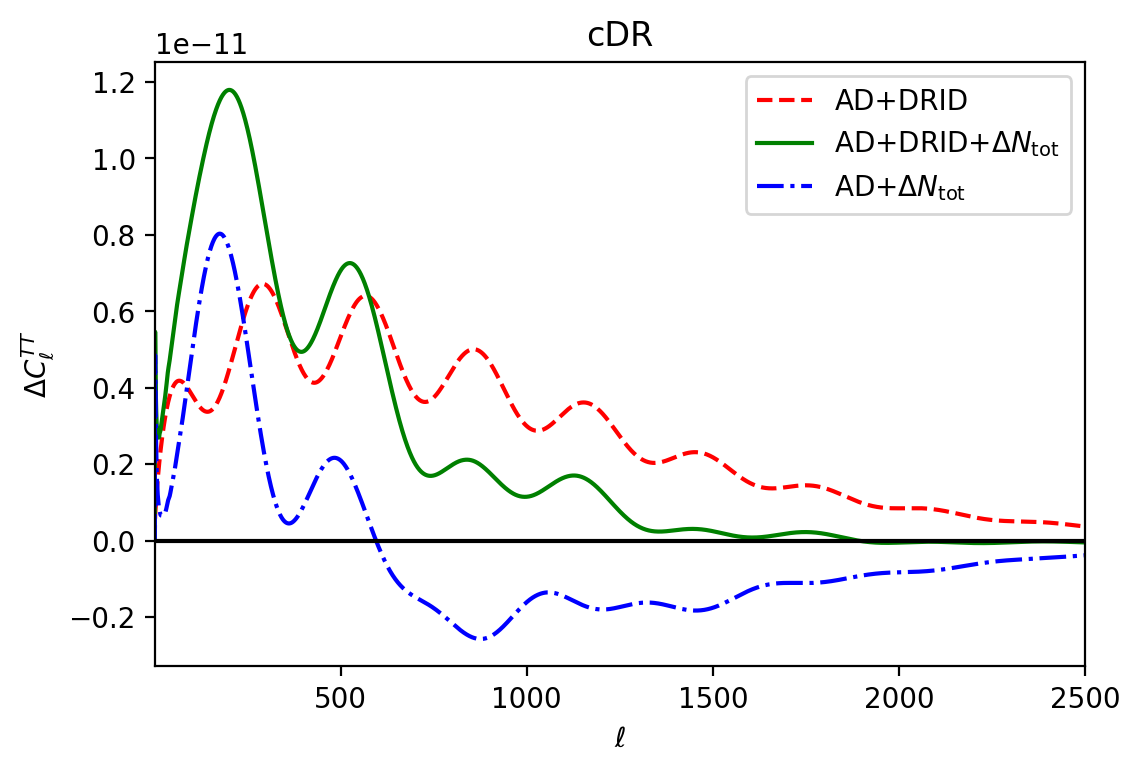

In [21]:
pp = 'tt'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],(addrid[pp] -ad[pp])*ellfactor , c='r', label = r'AD+DRID', ls='--')
plt.plot(addridneff['ell'],(addridneff[pp] - ad[pp])*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],(adneff[pp] - ad[pp])*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{TT}$')
plt.legend()
plt.title('cDR')

Text(0.5, 1.0, 'cDR')

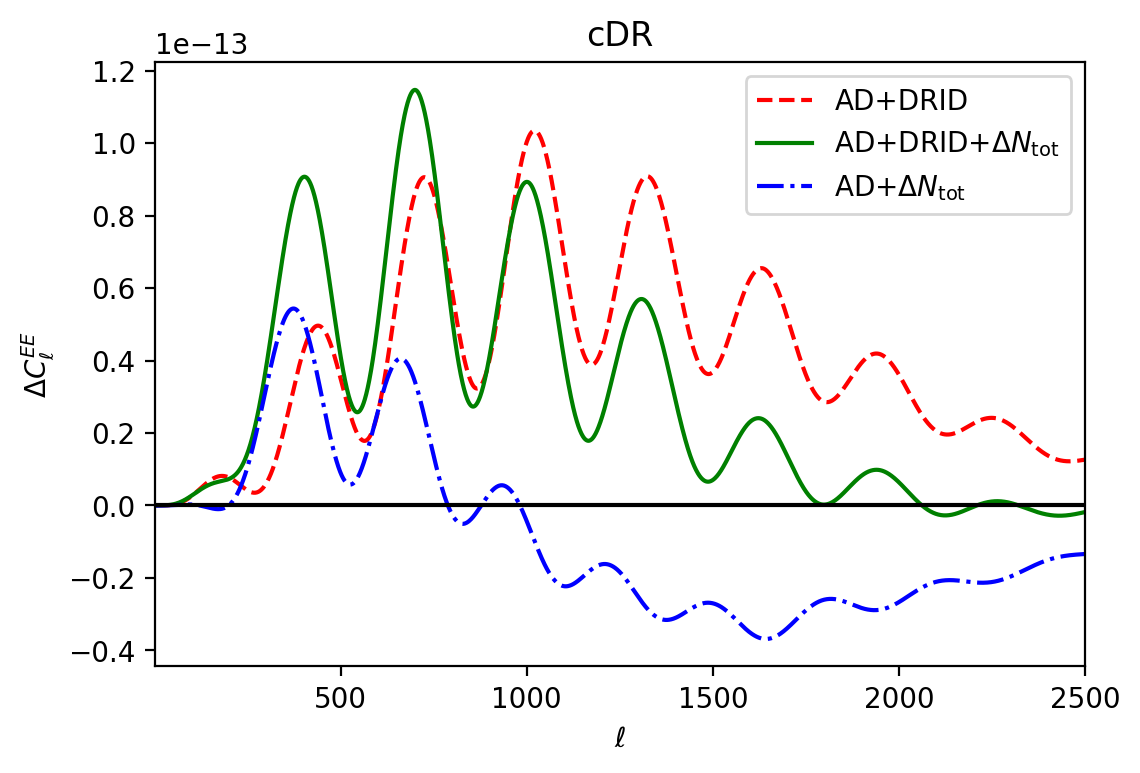

In [22]:
pp = 'ee'
plt.rcParams['figure.dpi'] = 200 
plt.xlim([2,2500])
plt.plot(addrid['ell'],(addrid[pp] -ad[pp])*ellfactor , c='r', label = r'AD+DRID', ls='--')
plt.plot(addridneff['ell'],(addridneff[pp] - ad[pp])*ellfactor, c='g', label = r'AD+DRID+$\Delta N_{\rm tot}$', ls='-')
plt.plot(ad['ell'],(adneff[pp] - ad[pp])*ellfactor, c='b', label = r'AD+$\Delta N_{\rm tot}$', ls ='-.')
plt.axhline(y=0, c='k')
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_\ell^{EE}$')
plt.legend()
plt.title('cDR')